## Importing Libraries

In [12]:
import os
import shutil
import random
import time
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



## Defining classes and directory root

In [2]:
base_path = r"C:\Users\Saumy\Desktop\CT" 
output_path = r"C:\Users\Saumy\Desktop\Ct balanced" 

classes = ['Cyst', 'Normal', 'Stone', 'Tumor']
min_class_size = 300  


## downsampling

In [3]:
os.makedirs(output_path, exist_ok=True)
for cls in classes:
    os.makedirs(os.path.join(output_path, cls), exist_ok=True)


for cls in classes:
    class_path = os.path.join(base_path, cls)
    images = os.listdir(class_path)

    
    if len(images) > min_class_size:
        selected_images = random.sample(images, min_class_size)
    else:
        selected_images = images  

    
    for img in selected_images:
        src = os.path.join(class_path, img)
        dst = os.path.join(output_path, cls, img)
        shutil.copy(src, dst)

print("Dataset has been balanced!")



Dataset has been balanced!


## Resizing image size and loading images

In [4]:
IMG_SIZE = 512

def load_images_from_folder(folder):
    images = []
    labels = []
    for class_name in classes:
        class_dir = os.path.join(folder, class_name)
        for filename in os.listdir(class_dir):
            img_path = os.path.join(class_dir, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale
            if img is not None:
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize image to a fixed size
                images.append(img)
                labels.append(class_name)
    return np.array(images), np.array(labels)

# Load balanced dataset
images, labels = load_images_from_folder(output_path)



## Flatten images for SVM and split data into test and train 

In [5]:
X = images.reshape(len(images), -1)

le = LabelEncoder()
y = le.fit_transform(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



## SVM pipeline

In [6]:
svm_model = make_pipeline(StandardScaler(), SVC(kernel='linear'))



In [7]:
# Start timing the training process
start_time = time.time()

# Train the SVM model
svm_model.fit(X_train, y_train)

# End timing the training process
end_time = time.time()



## Evaluate the model

Training time: 97.19 seconds
Accuracy: 97.50%


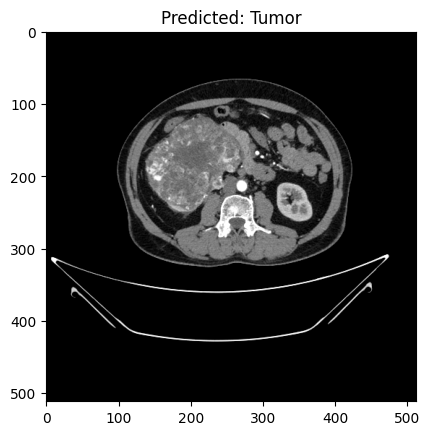

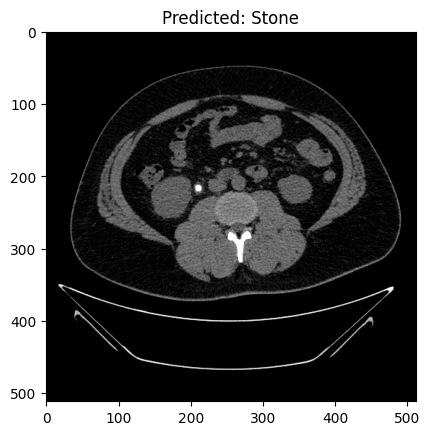

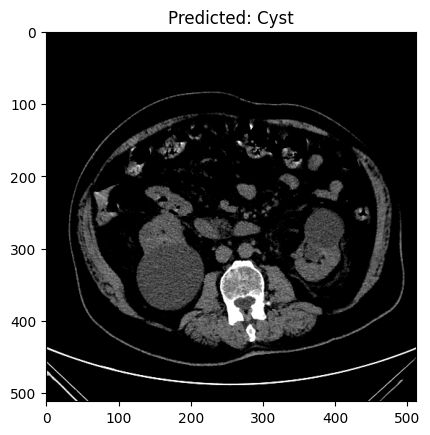

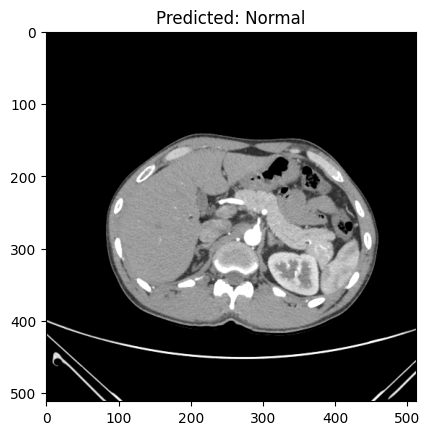

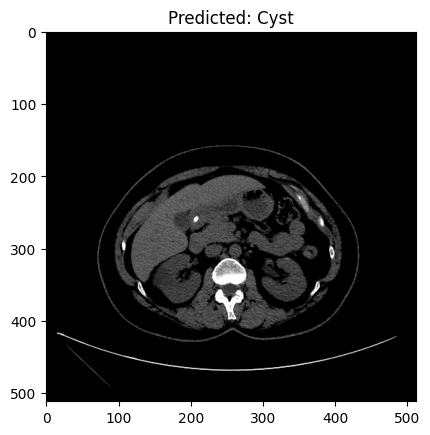

In [8]:
# Calculate and print the training time
print(f"Training time: {end_time - start_time:.2f} seconds")

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Show some test predictions
for i in range(5):
    plt.imshow(X_test[i].reshape(IMG_SIZE, IMG_SIZE), cmap='gray')
    plt.title(f'Predicted: {le.inverse_transform([y_pred[i]])[0]}')
    plt.show()  # Ensure no non-breaking space here


## Confusion Matrix

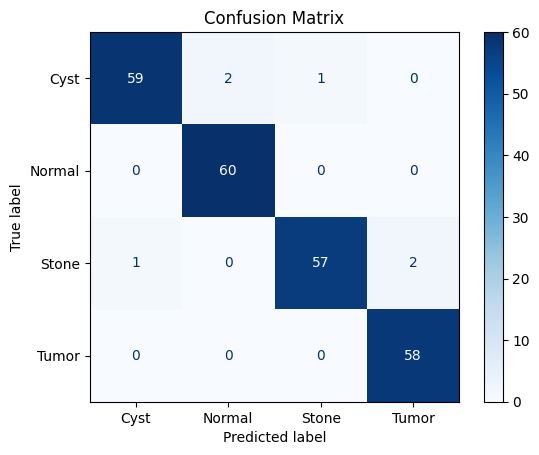

In [11]:
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix')
plt.show()

## Classification Report

In [15]:
report = classification_report(y_test, y_pred, target_names=le.classes_)

# Print classification report
print("\nClassification Report:\n")
print(report)


Classification Report:

              precision    recall  f1-score   support

        Cyst       0.98      0.95      0.97        62
      Normal       0.97      1.00      0.98        60
       Stone       0.98      0.95      0.97        60
       Tumor       0.97      1.00      0.98        58

    accuracy                           0.97       240
   macro avg       0.98      0.98      0.97       240
weighted avg       0.98      0.97      0.97       240

